In [14]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_excel("D:/New folder (2)/export-pkk_ban_sai_kanun-1d.xlsx")

In [12]:
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())

In [16]:
df.isnull().sum()

Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_10          0
pm_2_5         0
pm_2_5_sp      0
temperature    0
dtype: int64

In [18]:
df.count()

Unnamed: 0     325
timestamp      325
timezone       325
humidity       325
pm_10          325
pm_2_5         325
pm_2_5_sp      325
temperature    325
dtype: int64

In [19]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_10', 'pm_2_5',
       'pm_2_5_sp', 'temperature'],
      dtype='object')

In [20]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["month"] = df["timestamp"].dt.month
df["dayofweek"] = df["timestamp"].dt.dayofweek
df["day"] = df["timestamp"].dt.day

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   325 non-null    int64         
 1   timestamp    325 non-null    datetime64[ns]
 2   timezone     325 non-null    object        
 3   humidity     325 non-null    float64       
 4   pm_10        325 non-null    float64       
 5   pm_2_5       325 non-null    float64       
 6   pm_2_5_sp    325 non-null    float64       
 7   temperature  325 non-null    float64       
 8   month        325 non-null    int32         
 9   dayofweek    325 non-null    int32         
 10  day          325 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1), object(1)
memory usage: 24.2+ KB


In [22]:
columns_to_drop = ["timezone","Unnamed: 0","pm_10","pm_2_5_sp","year"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df

,timestamp,humidity,pm_2_5,temperature,month,dayofweek,day
0,2022-08-13 07:00:00,59.598346,13.961977,34.136879,8,5,13
1,2022-08-14 07:00:00,61.957933,8.818620,33.635054,8,6,14
2,2022-08-15 07:00:00,62.518257,13.911925,33.712602,8,0,15
3,2022-08-16 07:00:00,61.883203,8.951439,33.928646,8,1,16
4,2022-08-17 07:00:00,63.333942,5.572363,32.480765,8,2,17
...,...,...,...,...,...,...,...
320,2023-08-30 07:00:00,61.178323,4.357621,33.897428,8,2,30
321,2023-08-31 07:00:00,64.548621,3.066176,33.418582,8,3,31
322,2023-09-08 07:00:00,67.717183,9.905742,34.180494,9,4,8
323,2023-09-09 07:00:00,66.029513,8.417391,35.866261,9,5,9


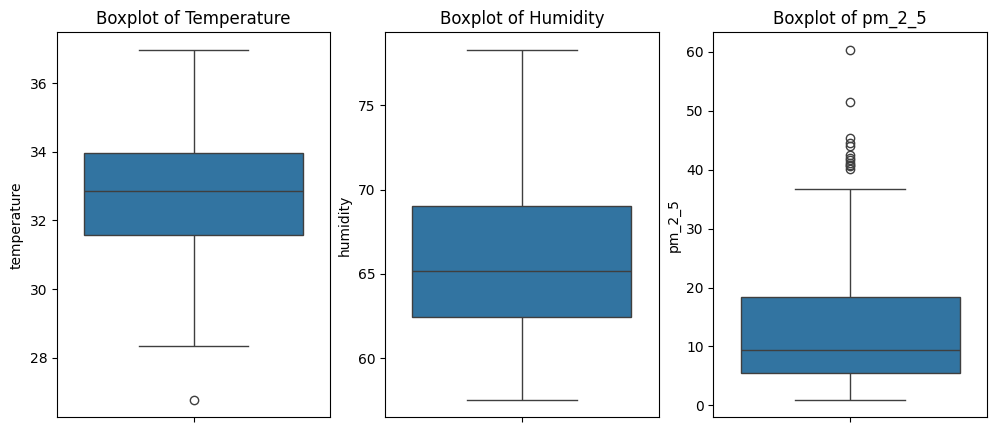

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of Temperature")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of Humidity")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of pm_2_5")

plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    325 non-null    datetime64[ns]
 1   humidity     325 non-null    float64       
 2   pm_2_5       325 non-null    float64       
 3   temperature  325 non-null    float64       
 4   month        325 non-null    int32         
 5   dayofweek    325 non-null    int32         
 6   day          325 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 14.1 KB


In [25]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['humidity'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['temperature'])) < 3)]  # ลบค่าผิดปกติออก
df = df[(np.abs(stats.zscore(df['pm_2_5'])) < 3)]  # ลบค่าผิดปกติออก

In [26]:
df['pm_2_5_lag1'] = df['pm_2_5'].shift(24)
df['pm_2_5_lag2'] = df['pm_2_5'].shift()
df['pm_2_5_lag3'] = df['pm_2_5'].shift(3)

In [27]:
df['Balance'] =  df['humidity'] - df['temperature']

In [28]:
df['PM2.5_MA3_prev_1'] = df['pm_2_5'].shift(1).rolling(window=2).mean()

In [29]:
df['PM2.5_MA3_prev_2'] = df['pm_2_5'].shift(2).rolling(window=2).mean()

In [30]:
df['PM2.5_MA3_prev_3'] = df['pm_2_5'].shift(168).rolling(window=168).mean()

In [31]:
df['PM2.5_MAX24_prev'] = df['pm_2_5'].shift(168).rolling(window=168).max()

In [1119]:
# df['pm_2_5_future_7d_avg_2'] = df['pm_2_5'].shift(-1).rolling(window=2, min_periods=1).mean()
# df['pm_2_5_future_7d_max_2'] = df['pm_2_5'].shift(-1).rolling(window=2, min_periods=1).max()

In [1120]:
# df['pm_2_5_future_7d_avg_3'] = df['pm_2_5'].shift(-1).rolling(window=3, min_periods=1).mean()
# df['pm_2_5_future_7d_max_3'] = df['pm_2_5'].shift(-1).rolling(window=3, min_periods=1).max()

In [1121]:
# df['pm_2_5_future_7d_avg_4'] = df['pm_2_5'].shift(-1).rolling(window=4, min_periods=1).mean()
# df['pm_2_5_future_7d_max_4'] = df['pm_2_5'].shift(-1).rolling(window=4, min_periods=1).max()

In [1122]:
# df['pm_2_5_future_7d_avg_5'] = df['pm_2_5'].shift(-1).rolling(window=5, min_periods=1).mean()
# df['pm_2_5_future_7d_max_5'] = df['pm_2_5'].shift(-1).rolling(window=5, min_periods=1).max()

In [1123]:
# df['pm_2_5_future_7d_avg_6'] = df['pm_2_5'].shift(-1).rolling(window=6, min_periods=1).mean()
# df['pm_2_5_future_7d_max_6'] = df['pm_2_5'].shift(-1).rolling(window=6, min_periods=1).max()

In [32]:
df.tail()

,timestamp,humidity,pm_2_5,temperature,month,dayofweek,day,pm_2_5_lag1,pm_2_5_lag2,pm_2_5_lag3,Balance,PM2.5_MA3_prev_1,PM2.5_MA3_prev_2,PM2.5_MA3_prev_3,PM2.5_MAX24_prev
319,2023-08-29 07:00:00,60.354777,7.247171,33.972864,8,1,29,12.004119,6.843563,6.005819,26.381914,10.763944,10.345072,NaN,NaN
320,2023-08-30 07:00:00,61.178323,4.357621,33.897428,8,2,30,14.830508,7.247171,14.684325,27.280895,7.045367,10.763944,NaN,NaN
321,2023-08-31 07:00:00,64.548621,3.066176,33.418582,8,3,31,6.828228,4.357621,6.843563,31.130040,5.802396,7.045367,NaN,NaN
322,2023-09-08 07:00:00,67.717183,9.905742,34.180494,9,4,8,16.671942,3.066176,7.247171,33.536689,3.711899,5.802396,NaN,NaN
323,2023-09-09 07:00:00,66.029513,8.417391,35.866261,9,5,9,11.698154,9.905742,4.357621,30.163253,6.485959,3.711899,NaN,NaN


In [33]:
df = df.dropna()

In [34]:
df.dtypes

timestamp           datetime64[ns]
humidity                   float64
pm_2_5                     float64
temperature                float64
month                        int32
dayofweek                    int32
day                          int32
pm_2_5_lag1                float64
pm_2_5_lag2                float64
pm_2_5_lag3                float64
Balance                    float64
PM2.5_MA3_prev_1           float64
PM2.5_MA3_prev_2           float64
PM2.5_MA3_prev_3           float64
PM2.5_MAX24_prev           float64
dtype: object

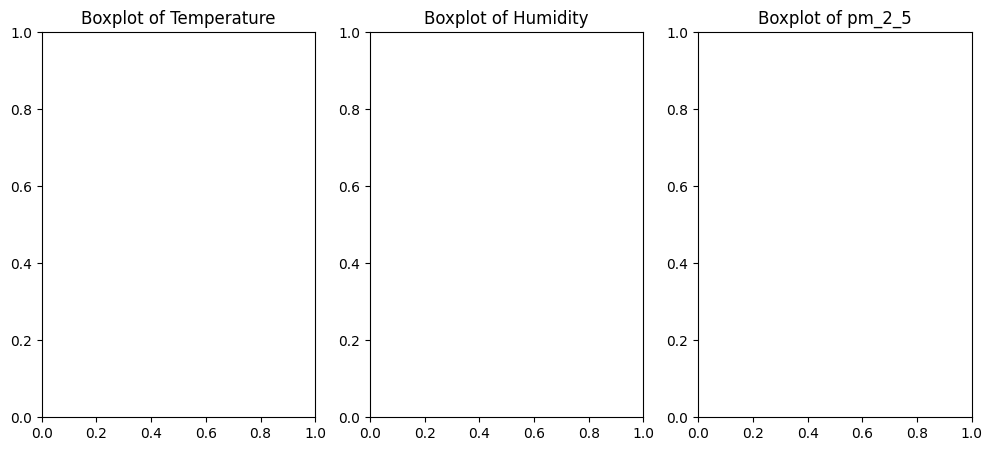

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of Temperature")

plt.subplot(1, 3, 2)
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of Humidity")

plt.subplot(1, 3, 3)
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of pm_2_5")

plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         0 non-null      datetime64[ns]
 1   humidity          0 non-null      float64       
 2   pm_2_5            0 non-null      float64       
 3   temperature       0 non-null      float64       
 4   month             0 non-null      int32         
 5   dayofweek         0 non-null      int32         
 6   day               0 non-null      int32         
 7   pm_2_5_lag1       0 non-null      float64       
 8   pm_2_5_lag2       0 non-null      float64       
 9   pm_2_5_lag3       0 non-null      float64       
 10  Balance           0 non-null      float64       
 11  PM2.5_MA3_prev_1  0 non-null      float64       
 12  PM2.5_MA3_prev_2  0 non-null      float64       
 13  PM2.5_MA3_prev_3  0 non-null      float64       
 14  PM2.5_MAX24_prev  0 non-null      float64  

d:\Term Pr\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Term Pr\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


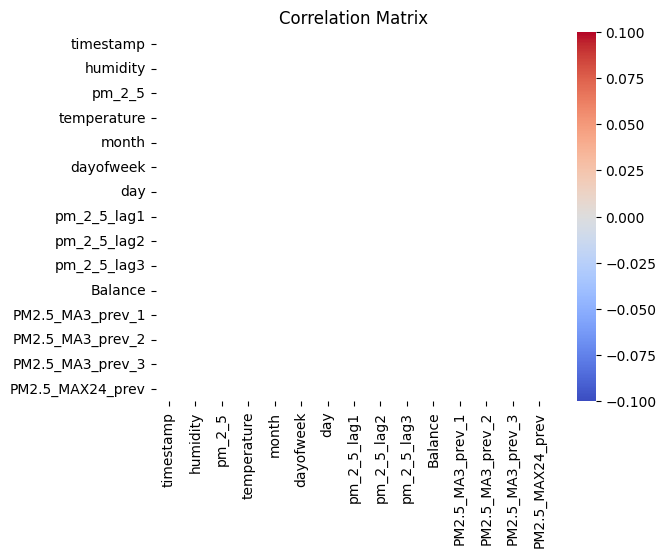

In [37]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [38]:
df_pedict = df
df = df.drop(columns=["timestamp"])

In [ ]:
# df.to_csv("r202.d.csv")

In [ ]:
# df_pedict.to_csv("pedict_r202.d.csv")

In [1]:
df

NameError: name 'df' is not defined

In [50]:
import pandas as pd

# อ่านไฟล์ CSV
df = pd.read_csv("D:/Term Pr/website_pm25/bansai.predict.h.csv")

# ลบคอลัมน์ที่ไม่จำเป็น (เช่น "Unnamed: 0")
df = df.drop(columns=["Unnamed: 0"])

# ตรวจสอบจำนวนคอลัมน์ใน DataFrame หลังจากลบ
print("จำนวนคอลัมน์ใน DataFrame หลังจากลบ 'Unnamed: 0':", len(df.columns))

# เปลี่ยนชื่อคอลัมน์ให้เข้าใจง่าย
df.columns = [
    "Timestamp",
    "Humidity",
    "PM2.5",
    "Temperature",
    "Month",
    "DayOfWeek",
    "WeekOfYear",
    "Day",
    "Hour",
    "PM2.5_Lag_12Day",
    "PM2.5_MA3_prev_12day",
    "PM2.5_MAX24_prev_12day",
    "PM2.5_MIN24_prev_12day",
]

# แสดงข้อมูลบางส่วนของไฟล์
print(df.tail())  # แสดง 5 แถวแรก
print(df.info())  # แสดงข้อมูลเกี่ยวกับคอลัมน์ใน DataFrame

จำนวนคอลัมน์ใน DataFrame หลังจากลบ 'Unnamed: 0': 13
                Timestamp   Humidity     PM2.5  Temperature  Month  DayOfWeek  \
6816  2023-09-08 11:00:00  64.844885  4.740741    37.595520      9          4   
6817  2023-09-08 12:00:00  62.175217  3.846154    39.293613      9          4   
6818  2023-09-08 13:00:00  60.751743  4.905660    39.895653      9          4   
6819  2023-09-08 14:00:00  60.075015  5.307692    40.084554      9          4   
6820  2023-09-10 15:00:00  78.298423  3.750000    26.779889      9          6   

      WeekOfYear  Day  Hour  PM2.5_Lag_12Day  PM2.5_MA3_prev_12day  \
6816         251    8    11         4.078431              6.771326   
6817         251    8    12         4.109091              6.760212   
6818         251    8    13         3.636364              6.743156   
6819         251    8    14         2.824561              6.732961   
6820         253   10    15         4.207547              6.727512   

      PM2.5_MAX24_prev_12day  PM2.5_MIN2

In [51]:
# แปลงคอลัมน์ Timestamp เป็น datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# หาวันที่ล่าสุดในข้อมูล
last_date = df["Timestamp"].max().date()

# แสดงผล
print("วันที่พรีดิกวันสุดท้าย:", last_date)

วันที่พรีดิกวันสุดท้าย: 2023-09-10


In [52]:
from datetime import timedelta

# แปลงคอลัมน์ Timestamp เป็น datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# หาวันที่ล่าสุดในข้อมูล
last_date = df["Timestamp"].max().date()

# คำนวณวันที่พรีดิกล่วงหน้า 1 สัปดาห์
predicted_date = last_date + timedelta(days=7)

# แสดงผล
print("วันที่พรีดิกล่วงหน้า 1 สัปดาห์:", predicted_date)

วันที่พรีดิกล่วงหน้า 1 สัปดาห์: 2023-09-17


In [53]:
print(future_dates.head())
print(future_dates.info())

NameError: name 'future_dates' is not defined

In [54]:
# หาวันที่ล่าสุดที่ใช้ทำนาย
latest_prediction_date = df_pedict["timestamp"].max()
print("วันที่ทำนายล่าสุด:", latest_prediction_date)

วันที่ทำนายล่าสุด: NaT


In [ ]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
weather_data = pd.read_csv("D:/Term Pr/website_pm25/bansai.predict.h.csv")

# ตรวจสอบข้อมูล
print(weather_data.head())  # แสดง 5 แถวแรกของข้อมูล

# คำนวณค่าเฉลี่ย, ค่ามากที่สุด, และค่าน้อยที่สุด
mean_temperature = weather_data["temperature"].mean()
max_temperature = weather_data["temperature"].max()
min_temperature = weather_data["temperature"].min()

mean_humidity = weather_data["humidity"].mean()
max_humidity = weather_data["humidity"].max()
min_humidity = weather_data["humidity"].min()

# แสดงผลลัพธ์
print(f"Mean Temperature: {mean_temperature}")
# print(f"Max Temperature: {max_temperature}")
# print(f"Min Temperature: {min_temperature}")

print(f"Mean Humidity: {mean_humidity}")
# print(f"Max Humidity: {max_humidity}")
# print(f"Min Humidity: {min_humidity}")

   Unnamed: 0            timestamp   humidity    pm_2_5  temperature  month  \
0         671  2022-09-09 12:00:00  64.212512  4.807692    37.180681      9   
1         672  2022-09-09 13:00:00  61.752717  4.565217    38.973913      9   
2         673  2022-09-09 14:00:00  60.919528  4.666667    38.566228      9   
3         674  2022-09-09 15:00:00  63.643168  4.027027    33.532903      9   
4         675  2022-09-09 16:00:00  65.447856  6.581395    32.058214      9   

   dayofweek  weekofyear  day  hour  pm_2_5_lag_12day  PM2.5_MA3_prev_12day  \
0          4         252    9    12          2.830508              6.922415   
1          4         252    9    13          2.983051              6.904012   
2          4         252    9    14          1.135593              6.876808   
3          4         252    9    15          1.240000              6.841754   
4          4         252    9    16          1.120000              6.809774   

   PM2.5_MAX24_prev_12day  PM2.5_MIN24_prev_12day 

In [58]:
import pandas as pd

# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv("D:/Term Pr/website_pm25/bansai.predict.h.csv")

# ตรวจสอบชื่อคอลัมน์
print(data.columns)  # แสดงชื่อคอลัมน์ทั้งหมด

# ตรวจสอบข้อมูล
print(data.head())  # แสดง 5 แถวแรกของข้อมูล

# คำนวณฟีเจอร์
# ตรวจสอบว่าชื่อคอลัมน์ 'PM2.5' มีอยู่จริงหรือไม่
if "PM2.5" in data.columns:
    data["pm_2_5_lag_12day"] = data["PM2.5"].shift(12)  # ค่าล่าช้า 12 วัน
    data["PM2.5_MA3_prev_12day"] = (
        data["PM2.5"].rolling(window=3).mean().shift(12)
    )  # ค่าเฉลี่ยเคลื่อนที่ 3 วัน
    data["PM2.5_MAX24_prev_12day"] = (
        data["PM2.5"].rolling(window=24).max().shift(12)
    )  # ค่าสูงสุดใน 24 ชั่วโมง
    data["PM2.5_MIN24_prev_12day"] = (
        data["PM2.5"].rolling(window=24).min().shift(12)
    )  # ค่าต่ำสุดใน 24 ชั่วโมง
else:
    print("คอลัมน์ 'PM2.5' ไม่มีอยู่ใน DataFrame")

# ตรวจสอบฟีเจอร์ที่คำนวณ
print(
    data[
        [
            "pm_2_5_lag_12day",
            "PM2.5_MA3_prev_12day",
            "PM2.5_MAX24_prev_12day",
            "PM2.5_MIN24_prev_12day",
        ]
    ].head(15)
)

Index(['Unnamed: 0', 'timestamp', 'humidity', 'pm_2_5', 'temperature', 'month',
       'dayofweek', 'weekofyear', 'day', 'hour', 'pm_2_5_lag_12day',
       'PM2.5_MA3_prev_12day', 'PM2.5_MAX24_prev_12day',
       'PM2.5_MIN24_prev_12day'],
      dtype='object')
   Unnamed: 0            timestamp   humidity    pm_2_5  temperature  month  \
0         671  2022-09-09 12:00:00  64.212512  4.807692    37.180681      9   
1         672  2022-09-09 13:00:00  61.752717  4.565217    38.973913      9   
2         673  2022-09-09 14:00:00  60.919528  4.666667    38.566228      9   
3         674  2022-09-09 15:00:00  63.643168  4.027027    33.532903      9   
4         675  2022-09-09 16:00:00  65.447856  6.581395    32.058214      9   

   dayofweek  weekofyear  day  hour  pm_2_5_lag_12day  PM2.5_MA3_prev_12day  \
0          4         252    9    12          2.830508              6.922415   
1          4         252    9    13          2.983051              6.904012   
2          4         252  